In [1]:
import pandas as pd

df = pd.read_csv('./Movie_EDA.csv')

In [2]:
df

,Unnamed: 0,영화명,매출액,관객수,스크린수,상영횟수,러닝타임,개봉월,감독_LE,계절_LE,국적_LE,배급사_LE,연령등급_LE,장르_LE,영화제목_길이,감독_국적
0,2086,델마와 루이스,46615500,9203,60,1021,124.0,11.0,221,0,6,11,3,6,6,1.0
1,2243,타락천사,89708920,8983,37,728,99.0,12.0,724,1,24,12,1,6,4,0.0
2,2097,트루먼 쇼,37811500,7462,104,1234,103.0,10.0,1210,0,6,122,0,21,4,1.0
3,879,스타워즈:에피소드1 보이지 않는 위험,1230713000,110700,204,5223,131.0,6.0,986,3,6,117,2,0,17,1.0
4,2241,브리짓 존스의 일기,63593240,9295,69,708,107.0,9.0,516,0,11,55,1,7,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,2098,스파이더맨: 노 웨이 홈,55697413760,5560940,2948,144754,156.0,12.0,1003,1,6,91,0,19,10,1.0
2082,2144,매트릭스: 리저렉션,1923032630,191280,970,15414,147.0,12.0,253,1,6,107,1,19,9,1.0
2083,2195,신데렐라 2: 마법에 걸린 왕자,259942550,29852,355,2372,81.0,12.0,658,1,6,19,2,18,13,1.0
2084,2121,킹스맨: 퍼스트 에이전트,6154017260,622461,1061,26294,130.0,12.0,384,1,6,109,3,19,11,1.0


In [3]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/Malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!")
    rc("font", family = "Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!")
    rc("font", family=font_name)
else:
    print("Unkown System...")
plt.rcParams["axes.unicode_minus"] = False

Hangul OK in your Windows!!


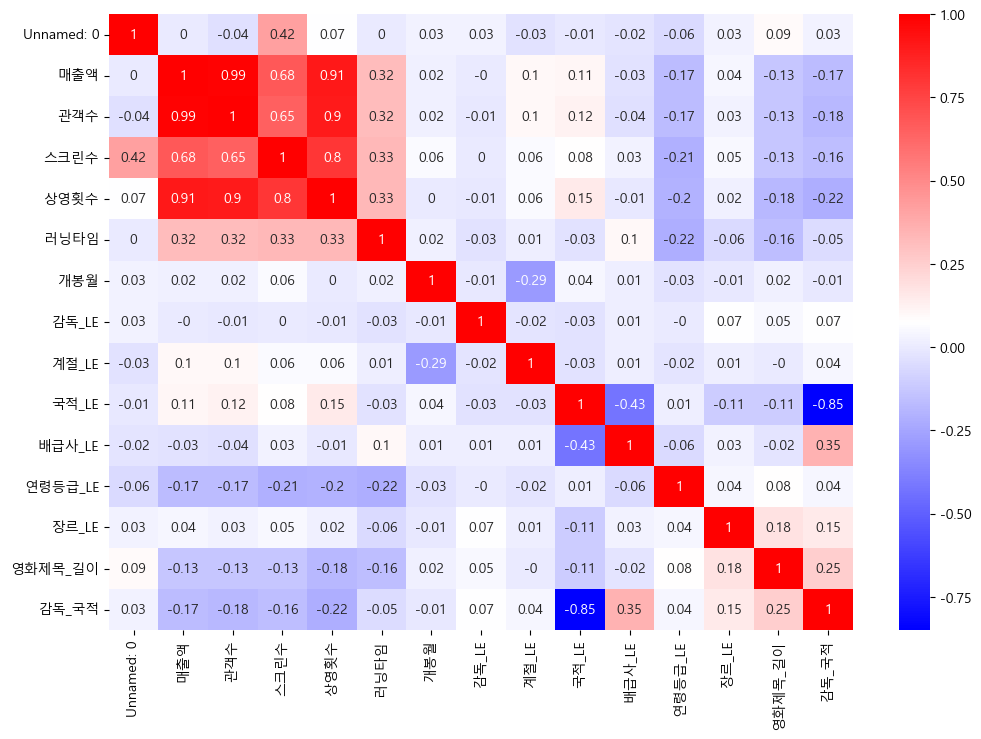

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr_mat = df.corr().round(2)
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

- 매출액과 관객수는 1:0.99 로 높다
- 예상대로 상영횟수가 높으면 매출액에 많은 상관관계가 있다
- 예상보다 배급사와 감독의 상관관계가 없다(표본수가 적어서 상관관계가 없는것으로 예상된다)
- 예상보다 계절에 관한 상관관계가 없다.

<AxesSubplot:>

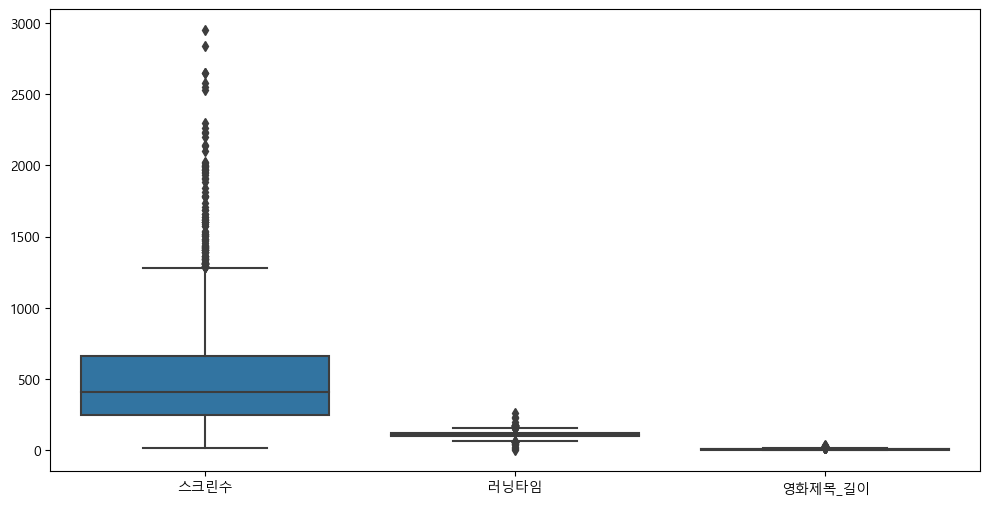

In [8]:
# 라벨 인코딩을 하지 않은 특성들의 boxplot
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data = df[['스크린수', '상영횟수','러닝타임','영화제목_길이']])

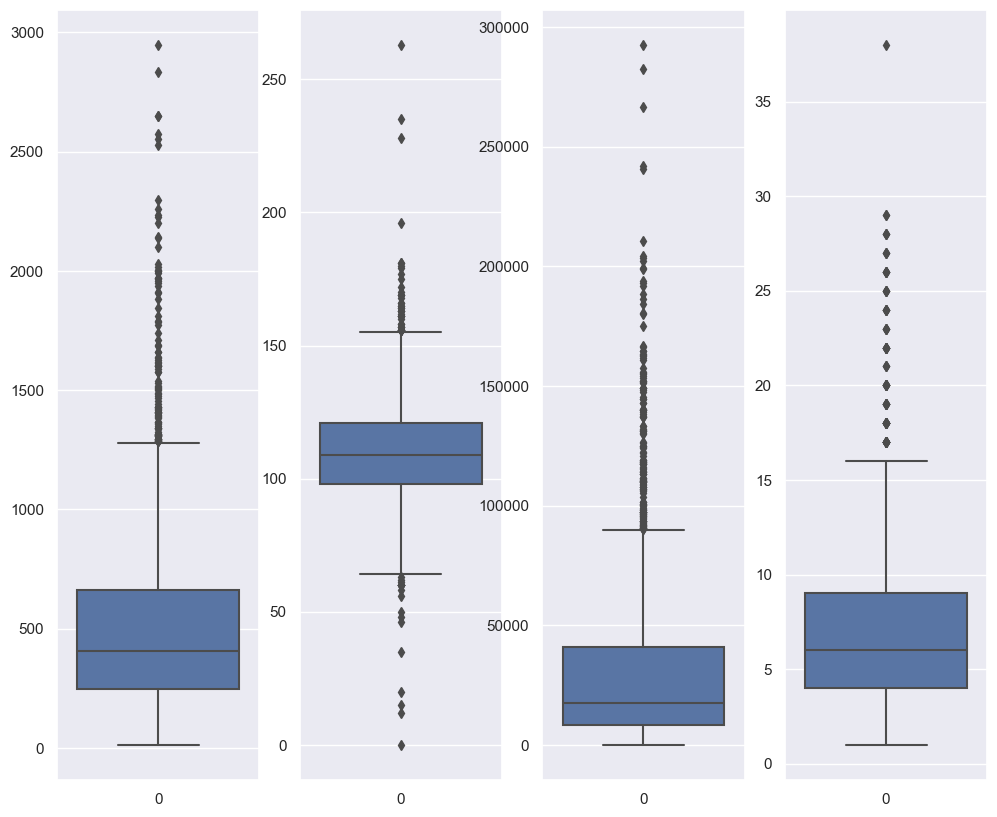

In [11]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(12,10)})
fig, ax = plt.subplots(ncols=4)

sns.boxplot(data = df['스크린수'], ax=ax[0])
sns.boxplot(data = df['러닝타임'], ax=ax[1])
sns.boxplot(data = df['상영횟수'], ax=ax[2])
sns.boxplot(data = df['영화제목_길이'], ax=ax[3])

plt.show();

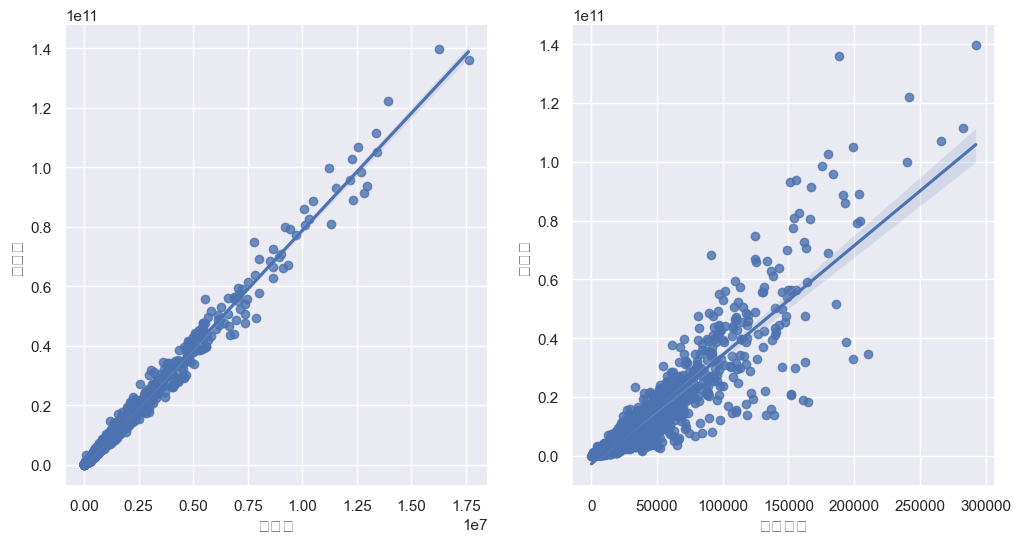

In [16]:
#  매출액과 상관관계가 0.9가 넘는 관객수, 상영횟수과 매출액 확인
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(12,6)})
fig, ax = plt.subplots(ncols=2)

sns.regplot(x='관객수', y='매출액', data=df, ax=ax[0])
sns.regplot(x='상영횟수', y='매출액', data=df, ax=ax[1])
plt.show();

C:\Users\TH_K\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TH_K\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45789 (\N{HANGUL SYLLABLE NING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TH_K\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TH_K\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TH_K\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font

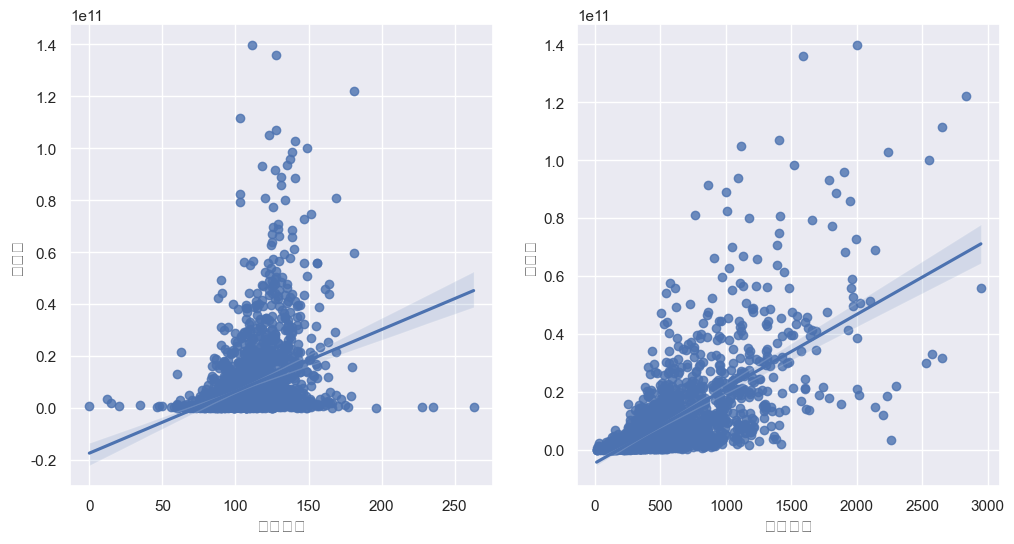

In [12]:
# 매출액과 직접적인 관계가 있는 관객수와 상영횟수를 제외하고 높은 특성 확인
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(12,6)})
fig, ax = plt.subplots(ncols=2)

sns.regplot(x='러닝타임', y='매출액', data=df, ax=ax[0])
sns.regplot(x='스크린수', y='매출액', data=df, ax=ax[1])
plt.show();

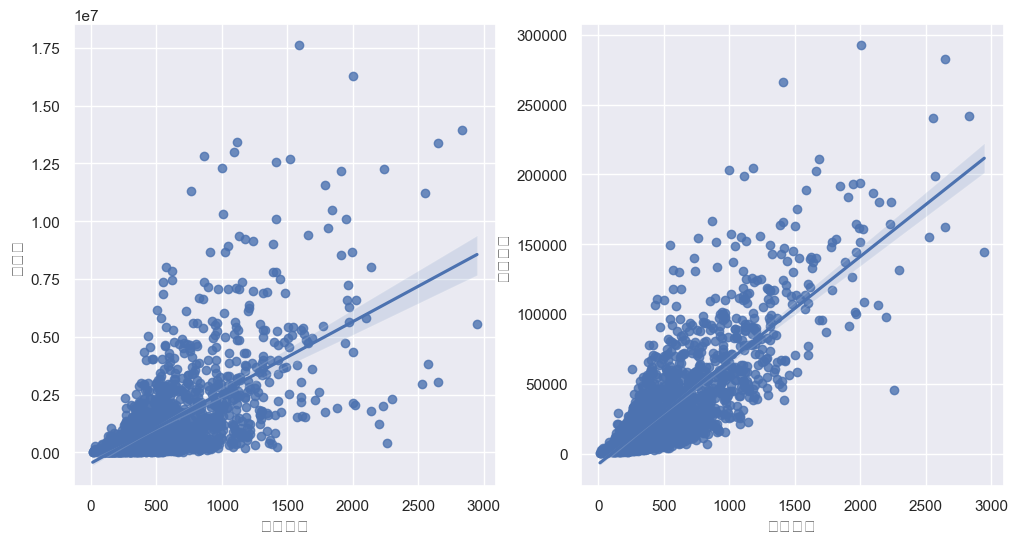

In [18]:
# 스크린수와 관객수의 상관관계 자료
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kirokkk123&logNo=220907318472

# 스크린수와 관객수 상영횟수 간 확인 
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(12,6)})
fig, ax = plt.subplots(ncols=2)

sns.regplot(x='스크린수', y='관객수', data=df, ax=ax[0])
sns.regplot(x='스크린수', y='상영횟수', data=df, ax=ax[1])
plt.show();

<AxesSubplot:>

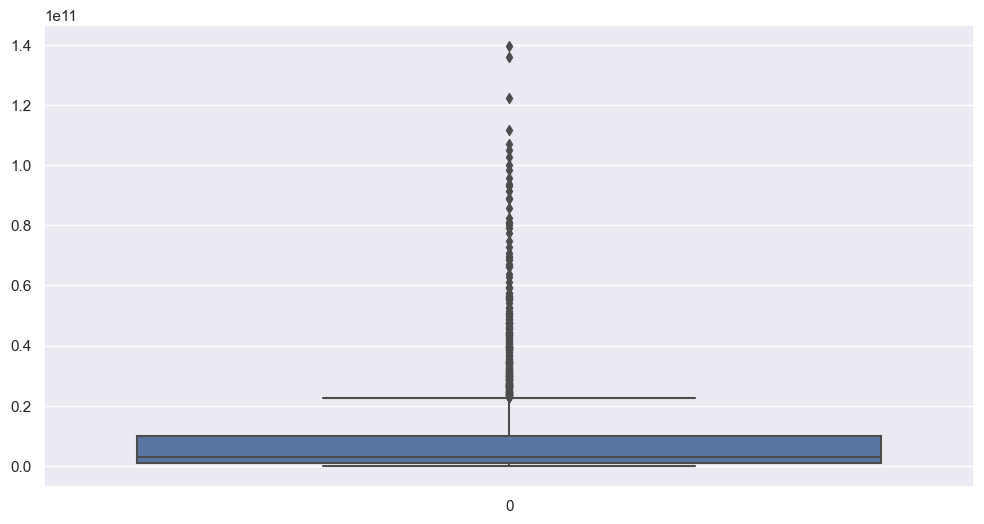

In [19]:
# Label(매출액) 값에 대한 boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data = df['매출액'])

- 이상치가 눈에 띈다 이상치 제거하지 말고 먼저 진행

## 머신러닝 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2086 non-null   int64  
 1   영화명         2086 non-null   object 
 2   매출액         2086 non-null   int64  
 3   관객수         2086 non-null   int64  
 4   스크린수        2086 non-null   int64  
 5   상영횟수        2086 non-null   int64  
 6   러닝타임        2086 non-null   float64
 7   개봉월         2086 non-null   float64
 8   감독_LE       2086 non-null   int64  
 9   계절_LE       2086 non-null   int64  
 10  국적_LE       2086 non-null   int64  
 11  배급사_LE      2086 non-null   int64  
 12  연령등급_LE     2086 non-null   int64  
 13  장르_LE       2086 non-null   int64  
 14  영화제목_길이     2086 non-null   int64  
 15  감독_국적       2086 non-null   float64
dtypes: float64(3), int64(12), object(1)
memory usage: 260.9+ KB


In [21]:
from sklearn.model_selection import train_test_split

X= df.drop(['매출액','영화명', 'Unnamed: 0'], axis = 1)
y = df['매출액']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMS of Train data : ', rmse_tr)
print('RMS of Test data : ', rmse_test)

RMS of Train data :  1323491148.5281916
RMS of Test data :  1196172838.9639993


In [24]:
# StandardScaler 적용해보기
from sklearn.model_selection import train_test_split

X= df.drop(['매출액','영화명', 'Unnamed: 0'], axis = 1)
y = df['매출액']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

estimators = [
    ('scalar' , StandardScaler()),
    ('clf', LinearRegression())
]
pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('clf', LinearRegression())])

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = pipe_lr.predict(X_train)
pred_test = pipe_lr.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMS of Train data : ', rmse_tr)
print('RMS of Test data : ', rmse_test)

RMS of Train data :  1323491148.528191
RMS of Test data :  1196172838.9639611


In [36]:
# MinMaxScaler 적용해보기
from sklearn.model_selection import train_test_split

X= df.drop(['매출액','영화명', 'Unnamed: 0'], axis = 1)
y = df['매출액']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

estimators = [
    ('scalar' , MinMaxScaler()),
    ('clf', LinearRegression())
]
pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)


Pipeline(steps=[('scalar', MinMaxScaler()), ('clf', LinearRegression())])

In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = pipe_lr.predict(X_train)
pred_test = pipe_lr.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMS of Train data : ', rmse_tr)
print('RMS of Test data : ', rmse_test)

RMS of Train data :  1323491148.5281913
RMS of Test data :  1196172838.9639604


- 값의 차이가 없다

## '관객수','상영횟수' 빼고 진행

In [41]:
from sklearn.model_selection import train_test_split

X= df.drop(['매출액','영화명', 'Unnamed: 0','관객수','상영횟수'], axis = 1)
y = df['매출액']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [42]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMS of Train data : ', rmse_tr)
print('RMS of Test data : ', rmse_test)

RMS of Train data :  10767624511.596924
RMS of Test data :  9589293163.712494


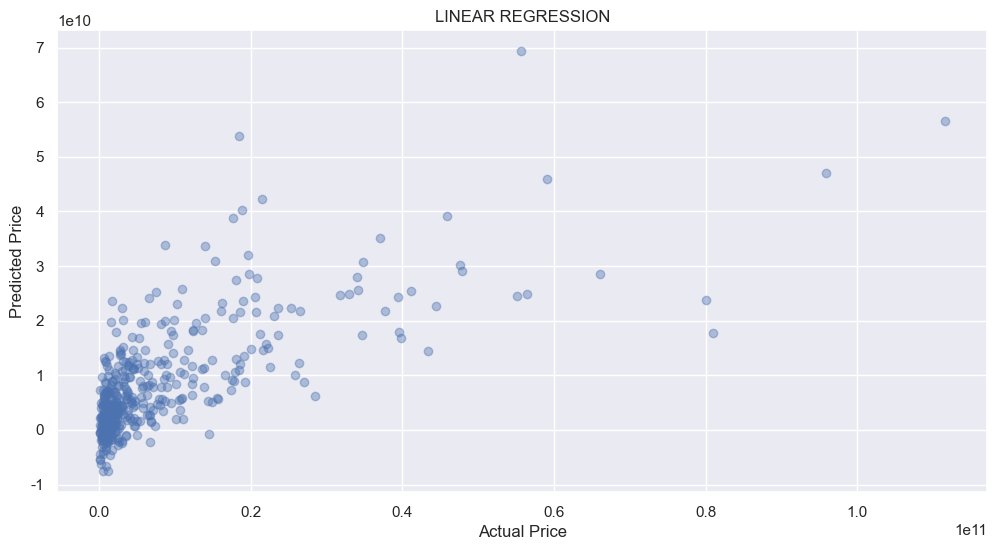

In [44]:
# 그래프 그려보기
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

## 매출액 이상치 없애기

<AxesSubplot:>

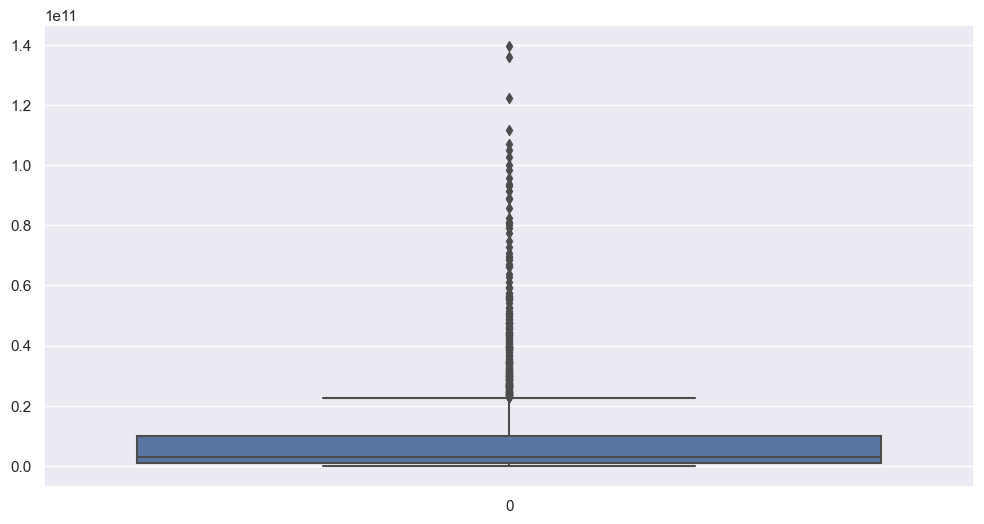

In [45]:
# Label 값에 대한 boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data = df['매출액'])

In [46]:
q1 = np.percentile(df['매출액'], 25)  
q2 = np.median(df['매출액'])
q3 = np.percentile(df['매출액'], 75)

q1,q2,q3

(1115263000.0, 3126317500.0, 9784365281.25)

In [47]:
iqr = q3 - q1

iqr

8669102281.25

In [48]:
upper_fence = q3 + iqr*1.5
lower_fence = q1 - iqr*1.5

upper_fence,lower_fence

(22788018703.125, -11888390421.875)

In [49]:
df[df['매출액'] > upper_fence].index

Int64Index([  77,   81,   90,   94,  100,  101,  168,  189,  218,  226,
            ...
            1827, 1836, 1846, 1858, 1908, 1912, 2016, 2023, 2060, 2081],
           dtype='int64', length=210)

In [50]:
for i in df[df['매출액'] > upper_fence].index:
    df.drop(axis=0, index=i, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 2085
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1876 non-null   int64  
 1   영화명         1876 non-null   object 
 2   매출액         1876 non-null   int64  
 3   관객수         1876 non-null   int64  
 4   스크린수        1876 non-null   int64  
 5   상영횟수        1876 non-null   int64  
 6   러닝타임        1876 non-null   float64
 7   개봉월         1876 non-null   float64
 8   감독_LE       1876 non-null   int64  
 9   계절_LE       1876 non-null   int64  
 10  국적_LE       1876 non-null   int64  
 11  배급사_LE      1876 non-null   int64  
 12  연령등급_LE     1876 non-null   int64  
 13  장르_LE       1876 non-null   int64  
 14  영화제목_길이     1876 non-null   int64  
 15  감독_국적       1876 non-null   float64
dtypes: float64(3), int64(12), object(1)
memory usage: 249.2+ KB


<AxesSubplot:>

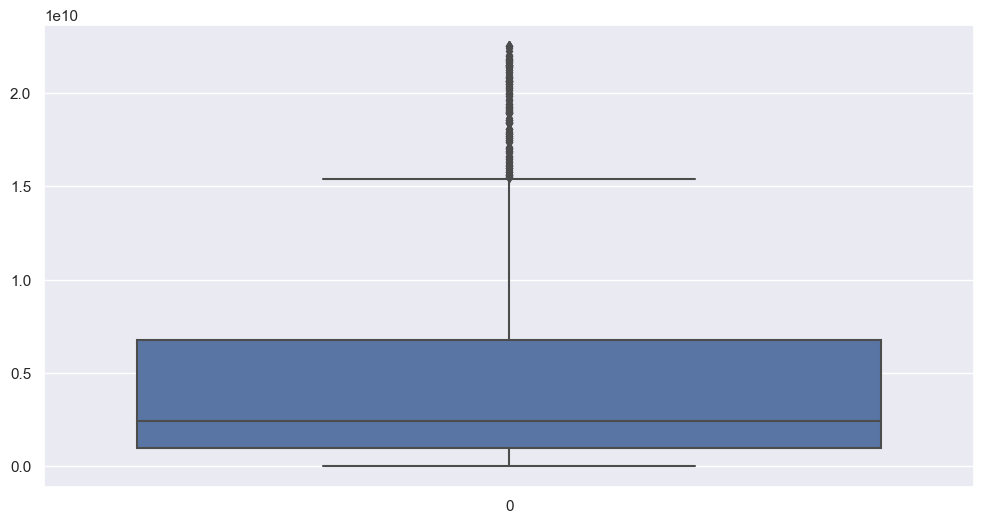

In [52]:
# 이상값 제거 후 Label 값에 대한 boxplot 
plt.figure(figsize=(12,6))
sns.boxplot(data = df['매출액'])

In [61]:
from sklearn.model_selection import train_test_split

X= df.drop(['매출액','영화명', 'Unnamed: 0','관객수','상영횟수'], axis = 1)
y = df['매출액']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [62]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [63]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMS of Train data : ', rmse_tr)
print('RMS of Test data : ', rmse_test)

RMS of Train data :  4234522518.8204103
RMS of Test data :  4350152240.619711


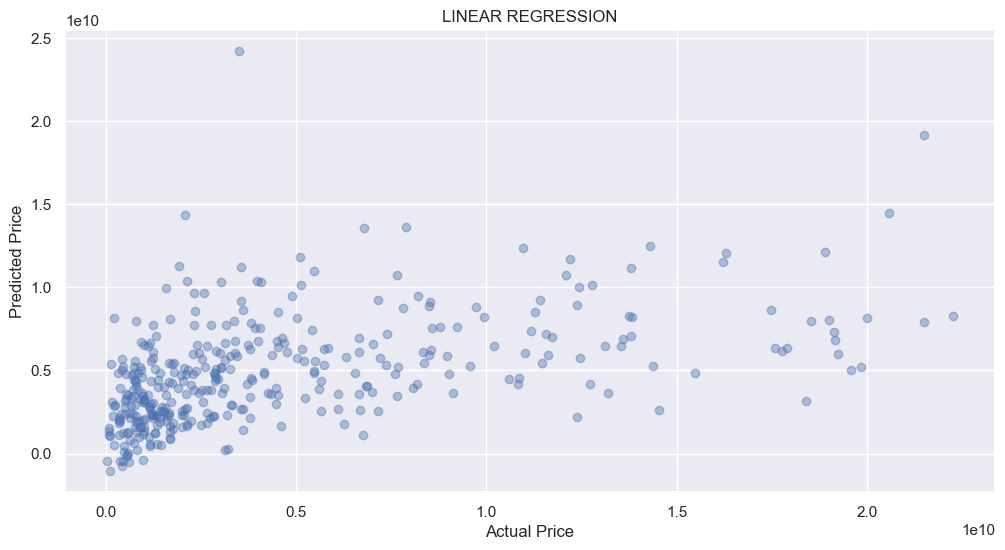

In [64]:
# 그래프 그려보기
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

X= df.drop(['매출액','영화명', 'Unnamed: 0','관객수','상영횟수'], axis = 1)
y = df['매출액']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

estimators = [
    ('scalar' , MinMaxScaler()),
    ('clf', LinearRegression())
]
pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scalar', MinMaxScaler()), ('clf', LinearRegression())])

In [67]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = pipe_lr.predict(X_train)
pred_test = pipe_lr.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMS of Train data : ', rmse_tr)
print('RMS of Test data : ', rmse_test)

RMS of Train data :  4234522518.8204103
RMS of Test data :  4350152240.619711
